In [329]:
# Here is imports for the linear regression model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
from scipy.stats import skew
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVR, SVC

<h3>Insights into the Dataframe</h3>

In [330]:
from scipy.stats import skew

In [331]:
# Save the data into a dataframe
df = pd.read_csv("predictive_maintenance.csv")

In [332]:
# Show the head of the dataframe (first 5 rows)
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [333]:
# Show the tail of the dataframe (last 5 rows)
df.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,No Failure


There are 1303 rows in total

In [334]:
# Describe the dataframe
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [335]:
# Show data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [336]:
# Get the name of all the columns (already in the df.info but this we can get when needed)
df.columns


Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [337]:
# Create a for loop to go through each column and all the value counts, this way it's easier to see ->
# all the value_counts for each column without necessaryly printing each separately-
for i in df.columns:
    x = df[i].value_counts()
    print(f"Column: {x}")

Column: UDI
9984    1
9983    1
9982    1
9981    1
9980    1
       ..
5       1
4       1
3       1
2       1
1       1
Name: count, Length: 10000, dtype: int64
Column: Product ID
L57163    1
M24842    1
L57161    1
L57160    1
L57159    1
         ..
L47184    1
L47183    1
L47182    1
L47181    1
M14860    1
Name: count, Length: 10000, dtype: int64
Column: Type
L    6000
M    2997
H    1003
Name: count, dtype: int64
Column: Air temperature [K]
300.7    279
298.9    231
297.4    230
300.5    229
298.8    227
        ... 
304.4      7
296.0      6
295.3      3
295.4      3
304.5      1
Name: count, Length: 93, dtype: int64
Column: Process temperature [K]
310.6    317
310.8    273
310.7    266
308.6    265
310.5    263
        ... 
306.9      4
313.7      4
305.8      3
305.7      2
313.8      2
Name: count, Length: 82, dtype: int64
Column: Rotational speed [rpm]
1452    48
1435    43
1447    42
1469    40
1429    40
        ..
1808     1
2424     1
2158     1
2097     1
1788     1
Na

<h3>Dataset Cleaning</h3>

In [338]:
# Check that all NaN values were deleted from the dataframe 
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [339]:
# Check for null/missing values within the dataframe
null_df = df[df.isna().any(axis=1)]

# Display the null dataframe
null_df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type


Since there is no null values to be dropped we can continue

In [340]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [341]:
# Check Duplicate values In the Dataset
df.duplicated().sum()

np.int64(0)

In [342]:
# Display the duplicates within the dataframe in a new dataframe created for duplicates
duplicated_df = df[df.duplicated(keep=False)]

# Display the duplicated dataframe
duplicated_df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type


In [343]:
df['UDI'].value_counts()

UDI
9984    1
9983    1
9982    1
9981    1
9980    1
       ..
5       1
4       1
3       1
2       1
1       1
Name: count, Length: 10000, dtype: int64

This seems to be a index variable, we can delete this since we already have index from pandas library. This is done for dataset cleaning and also that it doesn't confuse later on.

In [344]:
# Remove Unnamed: 0 column if it exists to avoid confusion and we don't need other index columns, since we have pandas
df = df.drop(columns=["UDI", "Product ID"], axis=0)

In [345]:
# Display the changed made to the dataframe
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


<h2>Optimization for basic visualization</h2>

In [346]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


In [347]:
# Display the head of the dataframe
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


<h3>Basic Visualization and Analysis</h3>

In [348]:
# Get Data Description of Objective Data Types
df.describe(include= 'object')

,Type,Failure Type
count,10000,10000
unique,3,6
top,L,No Failure
freq,6000,9652


In [349]:
# Get Data Description of Objective Data Types
df.describe(include= 'number')

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [350]:
# Identify faulty machines with 'Taregt' value 1
df_f = df[df.Target==1]
df_f['Failure Type'].value_counts()

Failure Type
Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: count, dtype: int64

In [351]:
# Drop No failure Rows that shows the Failure while it's actually not
idx= df_f[df_f['Failure Type']== 'No Failure'].index
df.drop(idx, axis=0, inplace= True)

In [352]:
df.shape

(9991, 8)

In [353]:
# Identify faulty machines with 'Taregt' value 0
df_f = df[df.Target==0]
df_f['Failure Type'].value_counts()

Failure Type
No Failure         9643
Random Failures      18
Name: count, dtype: int64

In [354]:
#Drop Not random Failure Which are not actually Failure 
idx= df_f[df_f['Failure Type']== 'Random Failures'].index
df.drop(idx, axis=0, inplace= True)

In [355]:
df.shape

(9973, 8)

In [356]:
# Identify numerical Columns
num_cols= df.select_dtypes(exclude='O').columns.tolist()
num_cols

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target']

In [357]:
# Handling the Outliers in data
df.replace([np.inf, -np.inf], np.nan, inplace= True)

<Axes: >

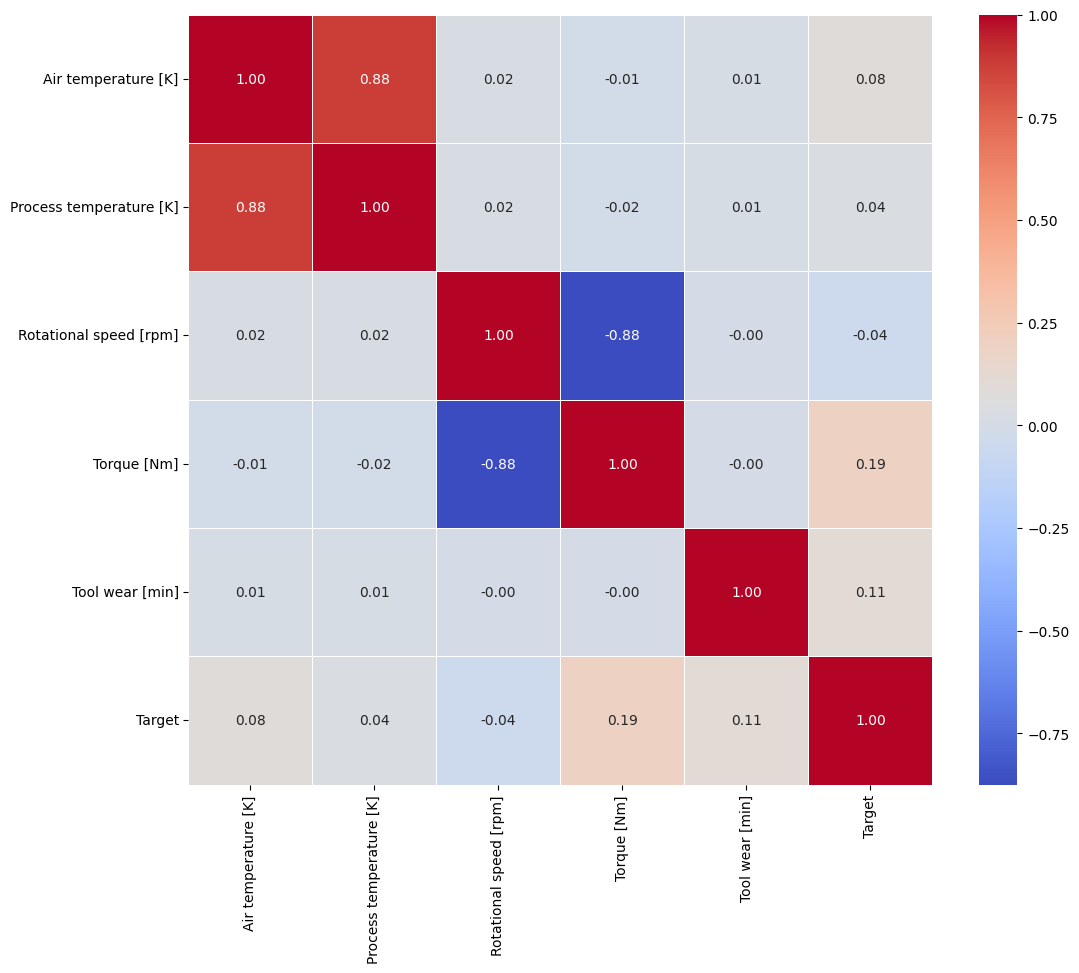

In [358]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=["number"])
# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

Nothing seems to have a really high correlation to price except Ram seems to have noticable correlation otherwise all others seem quite low.
Weight and Resolution_Width and Resolution_Height seem to have next most noticable correlation

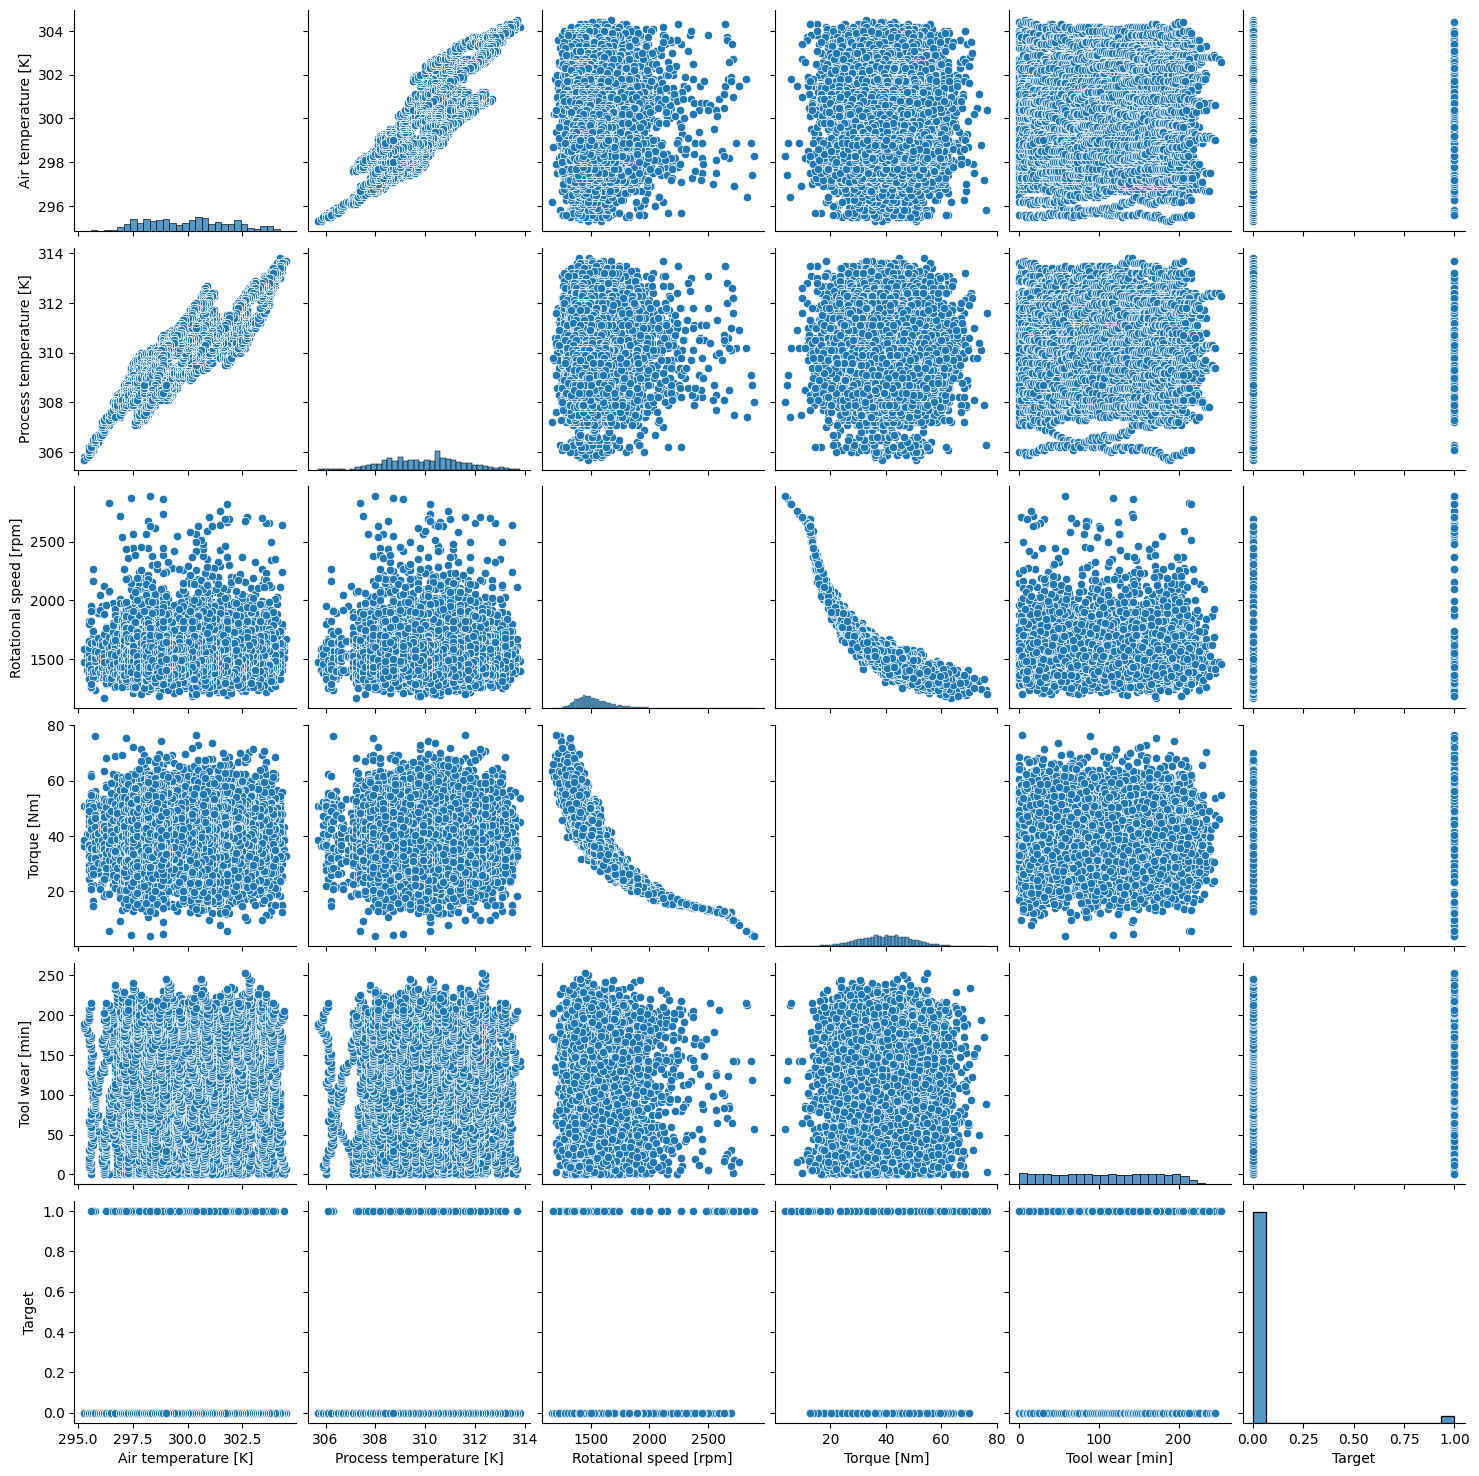

In [359]:
# pair plot to see everything at once
sns.pairplot(df_numeric)

# Nothing seems to correlate that well with price, this could be because of companies brand value or other possible factors like model name excetra

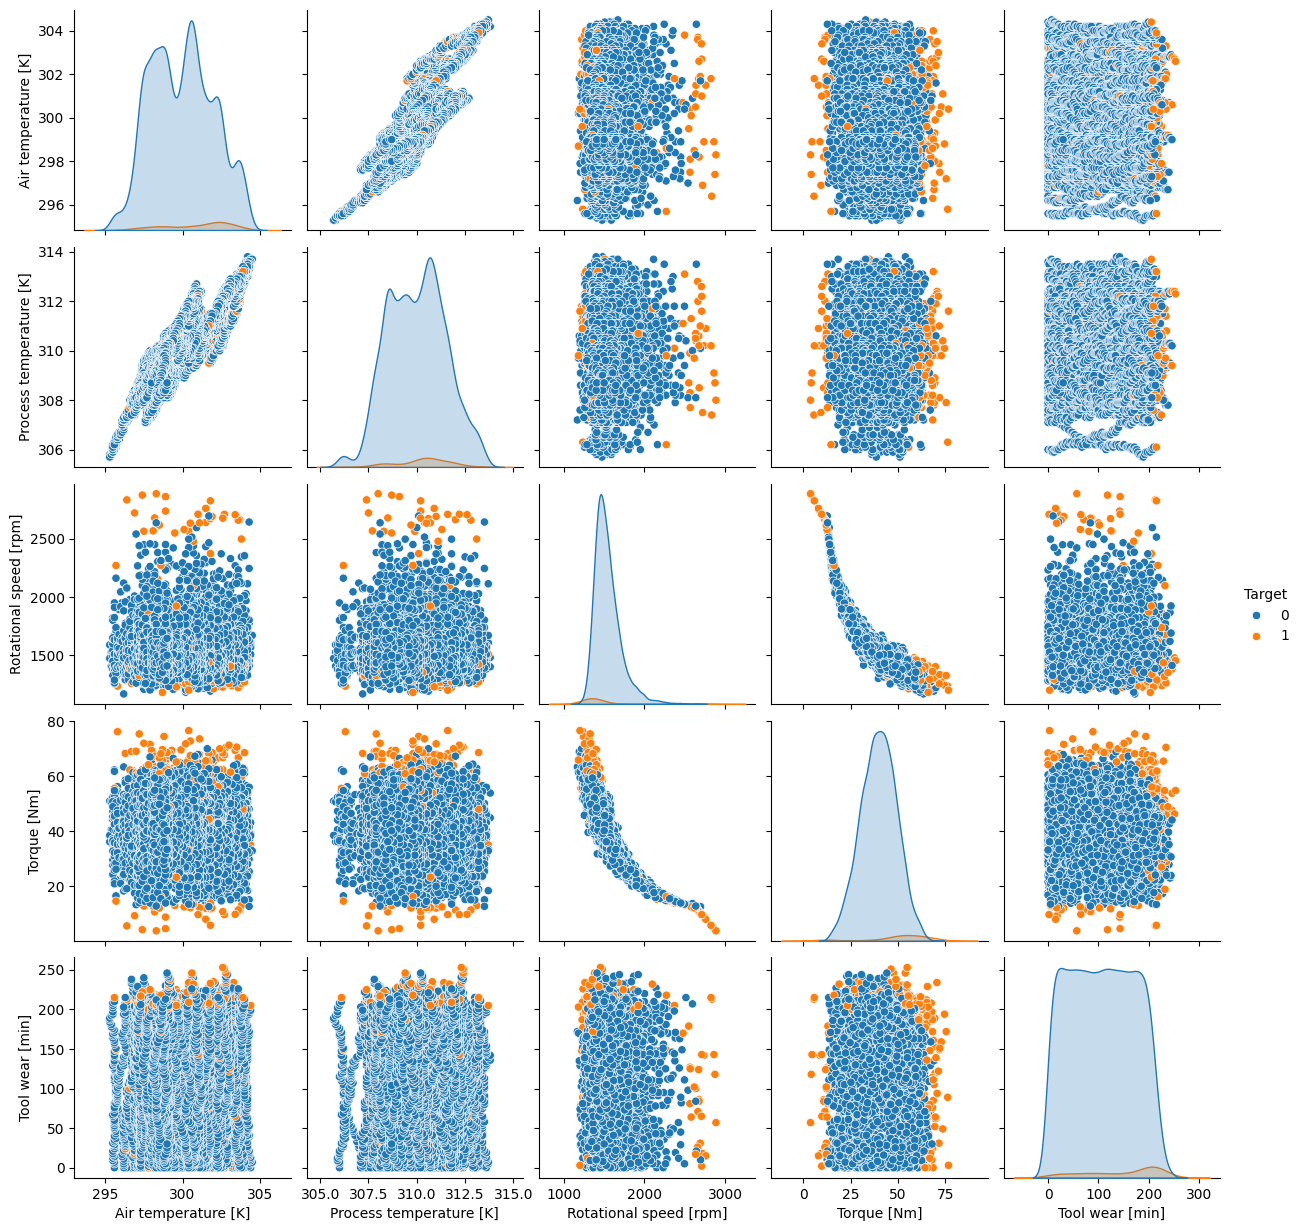

In [360]:
# pairplot
sns.pairplot(df, hue= 'Target')
plt.show()

<Axes: xlabel='Rotational speed [rpm]', ylabel='Density'>

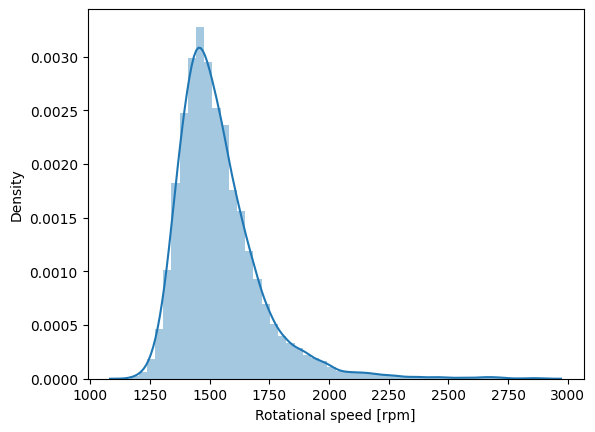

In [361]:
# Skewness of Rotational Speed
sns.distplot(df['Rotational speed [rpm]'])

In [362]:
# Get Skewness value
skewness = skew(df['Rotational speed [rpm]'])
print('Skewness: ', skewness)

Skewness:  1.9925593351071693


In [363]:
"""# Get numeric columns from the dataframe
numeric_columns = df.select_dtypes(include=["number"])

# Store helper columns in a list, these come from the loop down below
helper_columns = []

# Create for loop to go through columns and create new columns from ->
# the numeric columns where variable numerator is divided by denominator
for numerator in numeric_columns:
    for denominator in numeric_columns:
        if numerator != denominator:
            new_col_name = f"{numerator}_to_{denominator}"
            df[new_col_name] = (df[numerator] / df[denominator]).round(1)
            helper_columns.append(new_col_name)

# Remove columns containing any infinite values
df = df.loc[:, ~df.isin([np.inf, -np.inf]).any()]"""

'# Get numeric columns from the dataframe\nnumeric_columns = df.select_dtypes(include=["number"])\n\n# Store helper columns in a list, these come from the loop down below\nhelper_columns = []\n\n# Create for loop to go through columns and create new columns from ->\n# the numeric columns where variable numerator is divided by denominator\nfor numerator in numeric_columns:\n    for denominator in numeric_columns:\n        if numerator != denominator:\n            new_col_name = f"{numerator}_to_{denominator}"\n            df[new_col_name] = (df[numerator] / df[denominator]).round(1)\n            helper_columns.append(new_col_name)\n\n# Remove columns containing any infinite values\ndf = df.loc[:, ~df.isin([np.inf, -np.inf]).any()]'

These just made the accuracy worse overall

In [364]:
"""# Select only numeric columns
df_numeric = df.select_dtypes(include=["number"])
# Create a heatmap
plt.figure(figsize=(40, 40))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)"""

'# Select only numeric columns\ndf_numeric = df.select_dtypes(include=["number"])\n# Create a heatmap\nplt.figure(figsize=(40, 40))\nsns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)'

This was for a heatmap for all the helper columns above

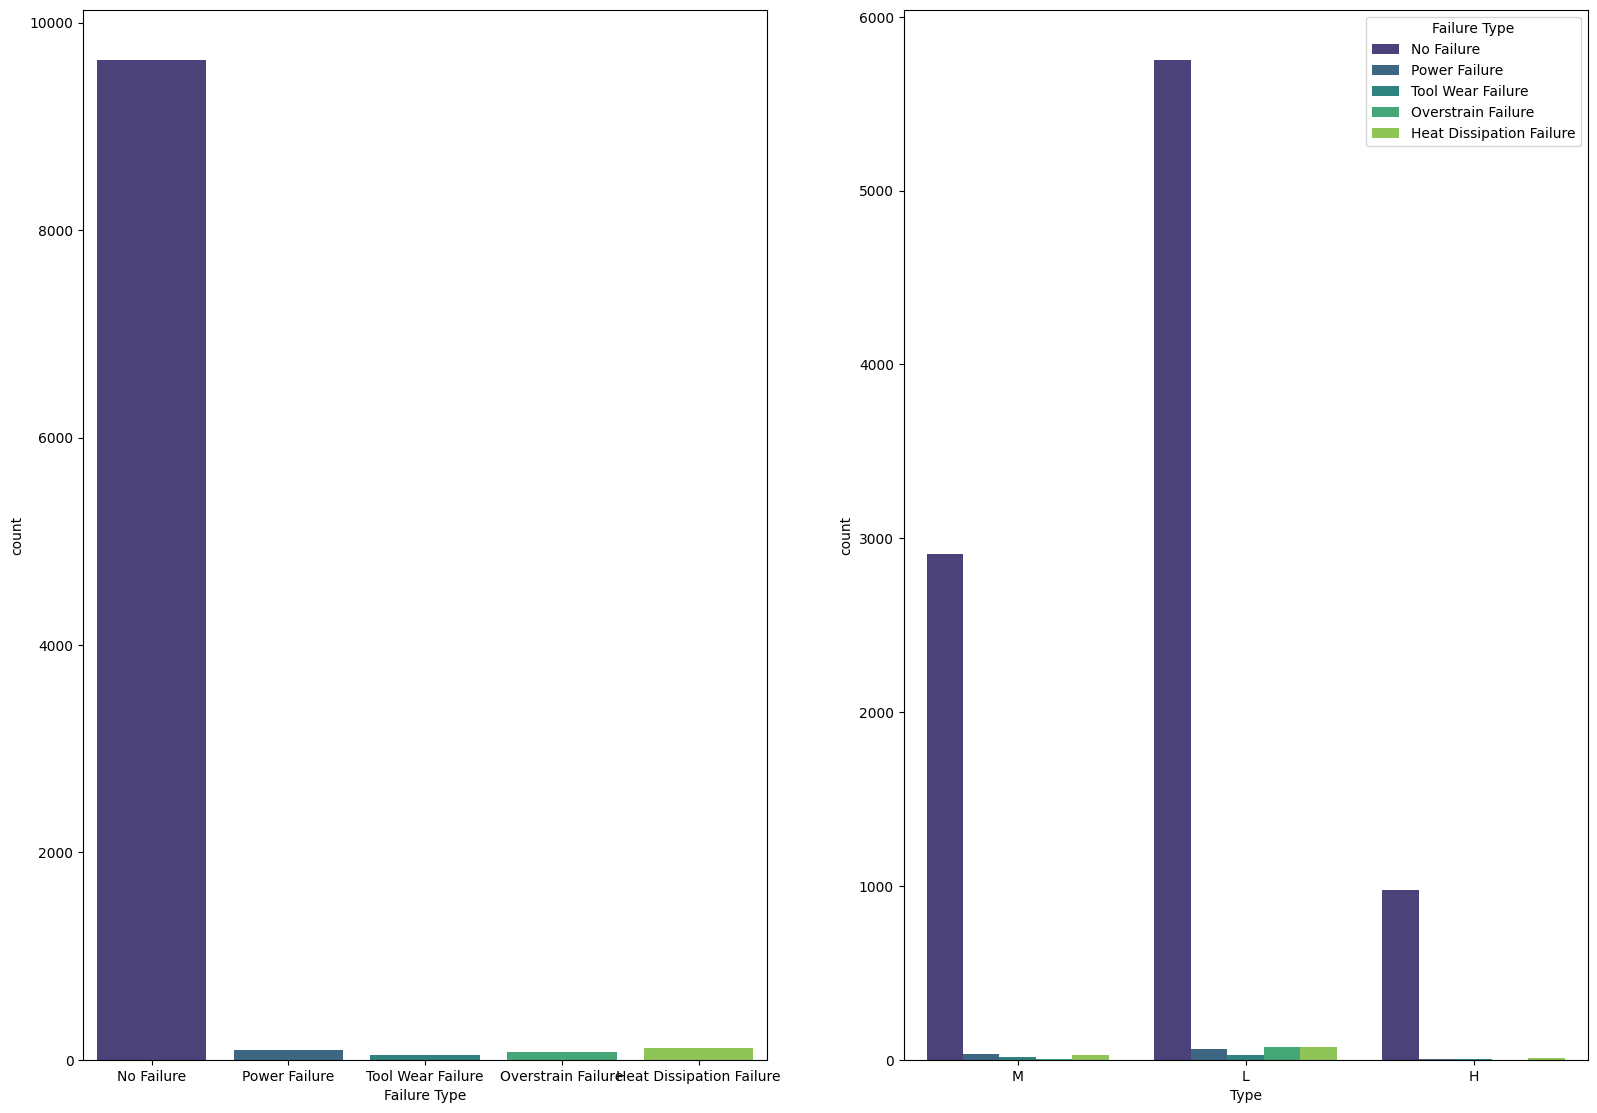

In [365]:
cat_cols = df[['Failure Type', 'Type']]

plt.figure(figsize= (30,30))

for i, col in  enumerate(cat_cols, 1):
    plt.subplot(2,3,i)
    sns.countplot(data= df, x= col, palette="viridis", hue='Failure Type')
plt.show()

<h3>Optimization for machine learning</h3>

In [366]:
# Calculate the first 30th and 70 percentile of "Price column"
Q1 = df["Rotational speed [rpm]"].quantile(0.2)
Q3 = df["Rotational speed [rpm]"].quantile(0.8)
IQR = Q3 - Q1

# Define the lower and upper bound of the data to detect outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame
df = df[(df["Rotational speed [rpm]"] >= lower_bound) & (df["Rotational speed [rpm]"] <= upper_bound)]

In [367]:
# Get columns of the dataframe if needed for further analysis and optimization
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

In [368]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9749 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     9749 non-null   object 
 1   Air temperature [K]      9749 non-null   float64
 2   Process temperature [K]  9749 non-null   float64
 3   Rotational speed [rpm]   9749 non-null   int64  
 4   Torque [Nm]              9749 non-null   float64
 5   Tool wear [min]          9749 non-null   int64  
 6   Target                   9749 non-null   int64  
 7   Failure Type             9749 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 685.5+ KB


In [370]:
# Get columns of the dataframe if needed for further analysis and optimization
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

In [371]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9452
Heat Dissipation Failure     112
Overstrain Failure            78
Power Failure                 64
Tool Wear Failure             43
Name: count, dtype: int64

In [372]:
# Display the dataframe
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


In [373]:
"""
df = df.drop(df[df['Failure Type'] == 'Heat Dissipation Failure'].index)
df = df.drop(df[df['Failure Type'] == 'Power Failure'].index)"""


"\ndf = df.drop(df[df['Failure Type'] == 'Heat Dissipation Failure'].index)\ndf = df.drop(df[df['Failure Type'] == 'Power Failure'].index)"

These columns increased accuracy if removed, but I want to get all the Failure Types into the analysis, This is because always the lastly numerated one has 0 accuracy no matter what you change.

In [374]:
"""# Get the failure type value_counts
df['Failure Type'].value_counts()"""

Failure Type
No Failure                  9452
Heat Dissipation Failure     112
Overstrain Failure            78
Power Failure                 64
Tool Wear Failure             43
Name: count, dtype: int64

In [375]:
# Drop failure type colum since it would give us information about the target variable ->
# Creating false positive model that would not work in real world
df.drop(columns=['Failure Type'], inplace=True)

In [376]:
# List of all boolean variables we want to convert 'Failure Type'
variables = ['Type']

# initalize encoder and convert everything
encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

In [377]:
# Create variables, which we are trying to predict, ->
# for the other variable drop the column that we are trying to predict
# for the other variable keep the column that we are trying to predict
# Preparing data for model Training
X= df.drop('Target', axis= 1)
y= df['Target']

In [378]:
# Create trainsplit with sample size 0.3 this means 70% of the data ->
# will be used for training and other 30% for testing
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [379]:
model = make_pipeline(StandardScaler(), 
                      PolynomialFeatures(degree=3, include_bias=True), 
                      LogisticRegression(solver="newton-cg", C=1.25))

In [380]:
# Create an empty linear regression model ->
# which we will fit into our data (start training it with our data)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [381]:
# Get the test predictions of the data into a variable ->
# which we will want to use to compare with the actual values
predictions = model.predict(X_test)

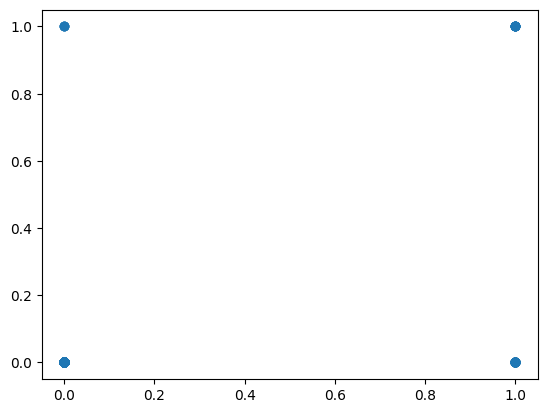

In [382]:
# Plot the predictions against the actual values (compare) to see difference ->
# if these values follow a diagonal line = good predictions
plt.scatter(y_test, predictions)
plt.show()

In [383]:
 # print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1890
           1       0.69      0.15      0.25        60

    accuracy                           0.97      1950
   macro avg       0.83      0.57      0.62      1950
weighted avg       0.97      0.97      0.96      1950


Model overall accuracy: 97.18%


Model seems to predict alright, with Target as a target value it seemed to be more accurate, but I might know where the issue lays.

[[1886    4]
 [  51    9]]


<Axes: >

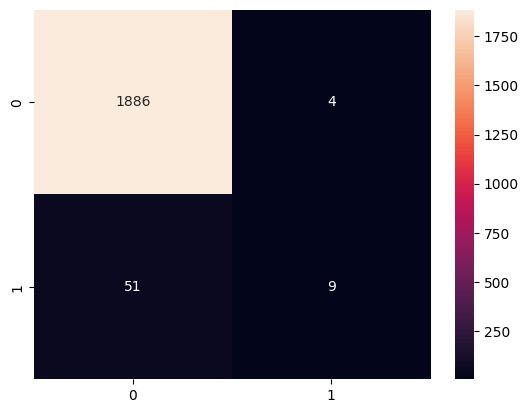

In [384]:
# Print Confusion Matrix
print(confusion_matrix(y_test, predictions))

# Display more visual heatmap of the confusion matrix
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g')

In [385]:
# Get the roc auc score 
roc_auc_score(y, model.predict_proba(X.values)[:, 1])

np.float64(0.920384547976592)

Text(0, 0.5, 'True Positive Rate')

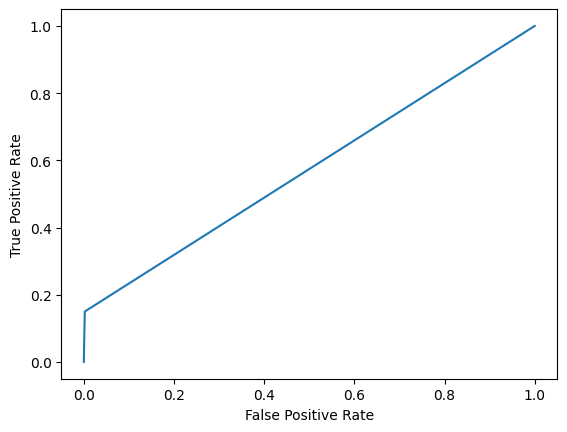

In [386]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [387]:
# Create variable tester row to test the model with a random row from the DataFrame
tester_row = df.sample(n=1)
print(f"Index: {tester_row.index[0]}")
print(tester_row)

Index: 9818
      Type  Air temperature [K]  Process temperature [K]  \
9818     2                298.6                    309.4   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  
9818                    1407         45.1              176       0  


In [388]:
# Create variables, which we are trying to predict, ->
# for the other variable drop the column that we are trying to predict
# for the other variable keep the column that we are trying to predict
X_tester_row = tester_row.drop(columns=["Target"])
y_tester_row = tester_row["Target"]

In [389]:
# Make predictions with the model using the tester row
y_pred_tester = model.predict(X_tester_row)

In [390]:
# Get the result of the prediction
result = model.predict(X_tester_row)[0]

# Display the predicted price for the tester row
print()
print(f"Predicted Result:")
print(f"{round(float(result), 2)}")
print("----------------")


Predicted Result:
0.0
----------------


In [391]:
# Get the price of the tester row to compare with the predicted price
row = df.loc[tester_row.index[0]]

# Display the actual price of the tester row
row["Target"]

np.float64(0.0)